# Analysis of FIFA 19 players Dataset

## Introduction

FIFA 19 is a football simulation video game developed by EA Vancouver as part of Electronic Arts' FIFA series. It is the 26th installment in the FIFA series, and was released on 28 September 2018 for PlayStation 3, PlayStation 4, Xbox 360, Xbox One, Nintendo Switch, and Microsoft Windows.

The FIFA dataset is on Kaggle and was originally scrapped from the sofifa website which contains data from the EA Sports' game FIFA and gets updated regularly with the release of new versions of the game. This dataset provide statistics for 18,207 players from different clubs and nationalities, on more than 70 attributes. For each attribute, there is an integer from 0 to 100 that measures how good a player is at that attribute. Examples of attributes are: Marking, Composure, GKDiving and ball control.  

## Objectives:
**I. Generate data visualizations for the FIFA players in terms of their skills, positions, wages, and nationalities.**

**II. Analyze the wages distribution geographically, within clubs, and according to different player attributes; Age, Weight, and Height.**

**III. Classify players according to their International Reputation, and examine the relationship between their International reputation and how they score on all of the given attributes.**

In [1]:
#Load Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import re
import plotly.graph_objects as go
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
#reading data and storing it
fifa_data = pd.read_csv('data.csv', delimiter = ',')
#printing first five rows
fifa_data.head()

Unnamed: 0      ID               Name  Age  \
0           0  158023           L. Messi   31   
1           1   20801  Cristiano Ronaldo   33   
2           2  190871          Neymar Jr   26   
3           3  193080             De Gea   27   
4           4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club  ... Composure Marking StandingTackle  SlidingTackle  \
0         FC Barcelona  ...      96.0    33.0           28.0           26.0   
1             Juventus  ...      95.0    28.0           31.0           23.0   
2  Paris Saint-Germain  ...      94.0    27.0           24.0           33.0   
3    Manchester United  ...      68.0    15.0           21.0           13.0   
4      Manchester City  ...      88.0    68.0           58.0           51.0   

  GKDiving  GKHandling  GKKicking  GKPositioning GKReflexes Release Clause  
0      6.0        11.0       15.0           14.0        8.0        €226.5M  
1      7.0        11.0       15.0           14.0       11.0        €127.1M  
2      9.0         9.0       15.0           15.0       11.0        €228.1M  
3     90.0        85.0       87.0           88.0       94.0        €138.6M  
4     15.0        13.0        5.0           10.0       13.0        €196.4M  

[5 rows x 89 columns]

**Getting description of data:**
The data contains 18,207 players, their names, clubs, age, photo, nationality, and attributes. The average age of the players is 25. The average International Reputation is 1, which ranges from 1 to 5, 5 being the highest. Maximum wage is 

In [3]:
fifa_data.drop(['Unnamed: 0'],axis=1, inplace=True)

In [4]:
fifa_data.describe()

ID           Age       Overall     Potential       Special  \
count   18207.000000  18207.000000  18207.000000  18207.000000  18207.000000   
mean   214298.338606     25.122206     66.238699     71.307299   1597.809908   
std     29965.244204      4.669943      6.908930      6.136496    272.586016   
min        16.000000     16.000000     46.000000     48.000000    731.000000   
25%    200315.500000     21.000000     62.000000     67.000000   1457.000000   
50%    221759.000000     25.000000     66.000000     71.000000   1635.000000   
75%    236529.500000     28.000000     71.000000     75.000000   1787.000000   
max    246620.000000     45.000000     94.000000     95.000000   2346.000000   

       International Reputation     Weak Foot   Skill Moves  Jersey Number  \
count              18159.000000  18159.000000  18159.000000   18147.000000   
mean                   1.113222      2.947299      2.361308      19.546096   
std                    0.394031      0.660456      0.756164      15.947765   
min                    1.000000      1.000000      1.000000       1.000000   
25%                    1.000000      3.000000      2.000000       8.000000   
50%                    1.000000      3.000000      2.000000      17.000000   
75%                    1.000000      3.000000      3.000000      26.000000   
max                    5.000000      5.000000      5.000000      99.000000   

           Crossing  ...     Penalties     Composure       Marking  \
count  18159.000000  ...  18159.000000  18159.000000  18159.000000   
mean      49.734181  ...     48.548598     58.648274     47.281623   
std       18.364524  ...     15.704053     11.436133     19.904397   
min        5.000000  ...      5.000000      3.000000      3.000000   
25%       38.000000  ...     39.000000     51.000000     30.000000   
50%       54.000000  ...     49.000000     60.000000     53.000000   
75%       64.000000  ...     60.000000     67.000000     64.000000   
max       93.000000  ...     92.000000     96.000000     94.000000   

       StandingTackle  SlidingTackle      GKDiving    GKHandling  \
count    18159.000000   18159.000000  18159.000000  18159.000000   
mean        47.697836      45.661435     16.616223     16.391596   
std         21.664004      21.289135     17.695349     16.906900   
min          2.000000       3.000000      1.000000      1.000000   
25%         27.000000      24.000000      8.000000      8.000000   
50%         55.000000      52.000000     11.000000     11.000000   
75%         66.000000      64.000000     14.000000     14.000000   
max         93.000000      91.000000     90.000000     92.000000   

          GKKicking  GKPositioning    GKReflexes  
count  18159.000000   18159.000000  18159.000000  
mean      16.232061      16.388898     16.710887  
std       16.502864      17.034669     17.955119  
min        1.000000       1.000000      1.000000  
25%        8.000000       8.000000      8.000000  
50%       11.000000      11.000000     11.000000  
75%       14.000000      14.000000     14.000000  
max       91.000000      90.000000     94.000000  

[8 rows x 43 columns]

**Data Cleaning**

First we notice many null values, so the missing data will be scrapped from the original website. Some of the variables will be changed to the appropriate format for the analysis, and some unwanted columns will be removed. 

In [5]:
#checking for null values
fifa_data.isnull().sum()

ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST                           2085
RS            

In [6]:
#WEBSCRAPPING to get missing data
detailed_columns = ['Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
                    'Body Type', 'Real Face', 'Position', 'Jersey Number', 'Joined', 'Loaned From',
                    'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
                    'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
                    'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
                    'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
                    'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 
                    'GKKicking', 'GKPositioning', 'GKReflexes', 'ID']
missing_data = fifa_data[fifa_data['Jersey Number'].isnull()]

detailed_data = pd.DataFrame(index = range(0, missing_data.count()[0]), columns = detailed_columns)
detailed_data.ID = missing_data.ID.values

player_data_url = 'https://sofifa.com/player/'
for id in detailed_data.ID:
    url = player_data_url + str(id)
    source_code = requests.get(url)
    plain_text = source_code.text
    soup = BeautifulSoup(plain_text, 'html.parser')
    skill_map = {}
    columns = soup.find('div', {'class': 'teams'}).find('div', {'class': 'columns'}).findAll('div', {'class': 'column col-6'})
    for column in columns:
        skills = column.findAll('li')
        for skill in skills:
            if(skill.find('label') != None):
                label = skill.find('label').text
                value = skill.text.replace(label, '').strip()
                skill_map[label] = value
    columns = soup.find('div', {'class': 'teams'}).find('div', {'class': 'columns'}).findAll('div', {'class': 'column col-5'})
    for column in columns:
        skills = column.findAll('li')
        for skill in skills:
            if(skill.find('label') != None):
                label = skill.find('label').text
                value = skill.text.replace(label, '').strip()
                skill_map[label] = value
    meta_data = soup.find('div', {'class': 'meta'}).text.split(' ')
    length = len(meta_data)
    weight = meta_data[length - 1]
    height = meta_data[length - 2].split('\'')[0] + '\'' + meta_data[length - 2].split('\'')[1].split('\"')[0]
    skill_map["Height"] = height
    skill_map['Weight'] = weight
    
    sections = soup.find('article').findAll('div', {'class': 'columns spacing'})[0:2]
    first = sections[0].findAll('div', {'class': 'column col-4'})
    second = sections[1].findAll('div', {'class': 'column col-4'})[:-1]
    sections = first + second
    for section in sections:
        items = section.find('ul').findAll('li')
        for item in items:
            value = int(re.findall(r'\d+', item.text)[0])
            name = ''.join(re.findall('[a-zA-Z]*', item.text))
            skill_map[str(name)] = value
    for key, value in skill_map.items():
        detailed_data.loc[detailed_data.ID == id, key] = value


In [7]:
#updating entries of players
for player_id in detailed_data['ID']:
    for attribute in detailed_columns:
        fifa_data.loc[fifa_data['ID'] == player_id, attribute] = detailed_data.loc[detailed_data['ID'] == player_id, attribute].iloc[0]
        

In [8]:
fifa_data['Club'].fillna('No Club', inplace = True)

In [9]:
#Some of these variables were not in the original website and the other we wont need
dropped_vars = ['Jersey Number',  'Contract Valid Until',  'Release Clause', 'Real Face','Body Type','Photo','Flag',
                'Club Logo','Joined', 'Loaned From','Work Rate', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM',
                'CAM', 'RAM',  'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 
        'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']
fifa_data = fifa_data.drop(dropped_vars, axis=1)

In [10]:
#renaming the variables
fifa_data.rename(columns={'Name':'name',
                          'Age':'age',
                         'Nationality':'nationality','Overall':'overall','Potential':'potential',
                          'Club':'club','Value':'value','Wage':'wage', 'Special':'special','Preferred Foot':'preferred_foot',
                          'International Reputation':'international_reputation','Weak Foot':'weak_foot',
                          'Skill Moves':'skill_moves','Position':'position','Height':'height','Weight':'weight',
                          'HeadingAccuracy':'heading_accuracy',
                          'Crossing':'crossing', 'Finishing':'finishing', 'ShortPassing':'short_passing',
                          'Volleys':'volleys',
                         'FKAccuracy':'fk_accuracy','Dribbling':'dribbling','Curve':'curve','LongPassing':'long_passing',
                          'BallControl':'ball_control', 'Acceleration':'acceleration', 'SprintSpeed':'sprint_speed',
                         'Agility':'agility', 'Reactions':'reactions', 'Balance':'balance', 'ShotPower':'shot_power',
                         'Jumping':'jumping','Stamina':'stamina', 'SprintSpeed':'sprint_speed', 'Strength':'strength',
                         'LongShots':'long_shots','Interceptions':'interceptions', 'Aggression':'aggression',
                         'Positioning':'positioning', 'Vision':'vision', 'Penalties':'penalties', 'Composure':'composure',
                         'Marking':'marking', 'StandingTackle':'standing_tackle', 'SlidingTackle':'sliding_tackle',
                         'GKDiving':'gk_diving', 'GKHandling':'gk_handling','GKKicking':'gk_kicking',
                         'GKPositioning':'gk_positioning', 'GKReflexes':'gk_reflexes'}, inplace = True)

Formatting variables

In [11]:
def get_value(Val):
    result = Val.replace('€', '')
    if 'M' in result:
        result = float(result.replace('M', ''))*1000000
    elif 'K' in Val:
        result = float(result.replace('K', ''))*1000
    return float(result)
fifa_data.wage = fifa_data.wage.apply(lambda x: get_value(x))
fifa_data.value = fifa_data.value.apply(lambda x: get_value(x))


In [12]:
def get_weight(val):
    try: 
        return float(val.replace('lbs', ''))
    except AttributeError:
        return val
fifa_data.weight = fifa_data.weight.apply(lambda x : get_weight(x))

In [13]:
def get_height(val):
    try: 
        return float(val.replace("'", '.'))
    except AttributeError:
        return val
fifa_data.height= fifa_data.height.apply(lambda x : get_height(x))   

In [14]:
fifa_data.weak_foot = fifa_data.weak_foot.apply(lambda x : int(x))
fifa_data.international_reputation = fifa_data.international_reputation.apply(lambda x : int(x))
fifa_data.skill_moves= fifa_data.skill_moves.apply(lambda x : int(x))

Dropping the rows with na entries

In [15]:
fifa_data = fifa_data.dropna()

Identifying new variables

In [16]:
def defending_func(fifa_data):
    return int(round(fifa_data[['interceptions','marking', 'standing_tackle', 
                               'sliding_tackle', 'heading_accuracy']].mean()))

def passing_func(fifa_data):
    return int(round((fifa_data[['vision', 'crossing', 'short_passing',
                               'long_passing','fk_accuracy','curve']].mean())))

def dribbling_func(fifa_data):
    return int(round((fifa_data[['agility', 'balance', 'reactions', 
                               'ball_control', 'dribbling']].mean())))

def shooting_func(fifa_data):
    return int(round((fifa_data[['positioning', 'finishing', 'shot_power', 
                               'long_shots', 'volleys', 'penalties']].mean())))

def pace_func(fifa_data):
    return int(round((fifa_data[['acceleration', 'sprint_speed']].mean())))

def physical_func(fifa_data):
    return int(round((fifa_data[['jumping', 'stamina', 'strength', 'aggression', 
                               'composure']].mean())))
def GK_func(fifa_data):
    return int(round((fifa_data[['gk_handling','gk_kicking', 'gk_positioning', 'gk_reflexes', 'gk_diving']].mean())))

In [17]:
fifa_data['Defending'] = fifa_data.apply(defending_func, axis=1)
fifa_data['Passing'] = fifa_data.apply(passing_func, axis=1)
fifa_data['Dribbling'] = fifa_data.apply(dribbling_func, axis=1)
fifa_data['Shooting'] = fifa_data.apply(shooting_func, axis=1)
fifa_data['Pace'] = fifa_data.apply(pace_func, axis=1)
fifa_data['Physical'] = fifa_data.apply(physical_func, axis=1)
fifa_data['GK'] = fifa_data.apply(GK_func, axis=1)

**Data Visualization**

First, we will have an overview of the players by countries, we want to get an idea of how players are distributed across countries. As shown below this is an interactive heat map of the count of players by their nationalities across the world. It could be observed that most of the players are from Germany, Spain, Brazil, and Argentina. With Columbia, France, and Italy coming in the second place with the most count of players.

In [18]:
count_df = pd.DataFrame(fifa_data.groupby(['nationality'])['ID'].count().reset_index())

fig = go.Figure(data=go.Choropleth(
    locations=count_df['nationality'], # Spatial coordinates
    z = count_df['ID'].astype(float), # Data to be color-coded
    locationmode = 'country names', # set of locations match entries in `locations`
    colorscale = 'Blues',
    colorbar_title = "Number of players",
))
layout = go.Layout(title = 'Count of Players by Region')
fig.update_layout(
    title_text = 'Count of Players by Region'
)
fig.show()

Next, we look at the distribution of players among the different field positions. We can observe that the highest count is for the striker position (ST), more than 2000 players, and second most players are goal keepers (GK), and third most is the corner back position (CB)

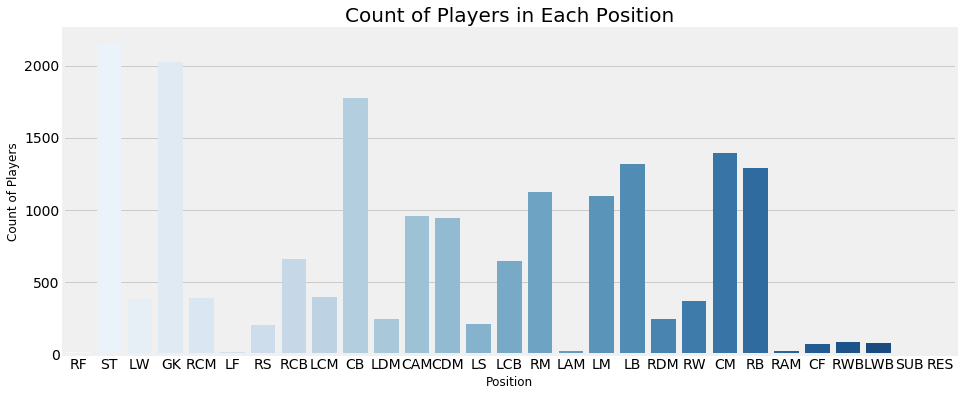

In [19]:
plt.figure(figsize = (16, 6))
plt.style.use('fivethirtyeight')
ax = sns.countplot('position', data = fifa_data, palette = 'Blues')
ax.set_xlabel(xlabel = 'Position', fontsize = 12)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 12)
ax.set_title(label = 'Count of Players in Each Position', fontsize = 20)
plt.show()

We can observe here that 77% of the players prefer their right foot and 23% prefer their left foot which is almost a qaurter of the total number of players.

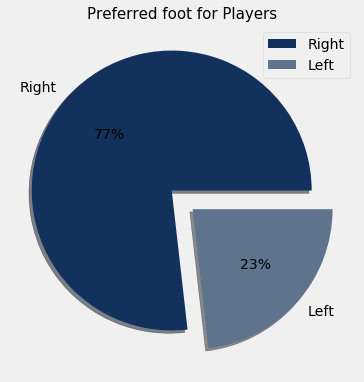

In [20]:
plt.rcParams['figure.figsize'] = (6, 6)
labels = ['Right', 'Left']
sizes = fifa_data['preferred_foot'].value_counts()
colors =['#12325D', '#60738D'] 
explode = [0.1,0.1]
plt.pie(sizes, labels = labels, autopct='%1.0f%%',colors = colors, explode = explode, shadow = True)
plt.title('Preferred foot for Players', fontsize = 15)
plt.legend()
plt.show()

Looking at the distribution of Age across all players we can see that it's close to a normal distribution skewed to the right. Which makes sense, as the football player's career length is very short, it starts at around age 15 or 16, then they reach their peak at around 25, and a few players get to continue playing beyond the 30 marker. Which is very evident from the graph shown below.

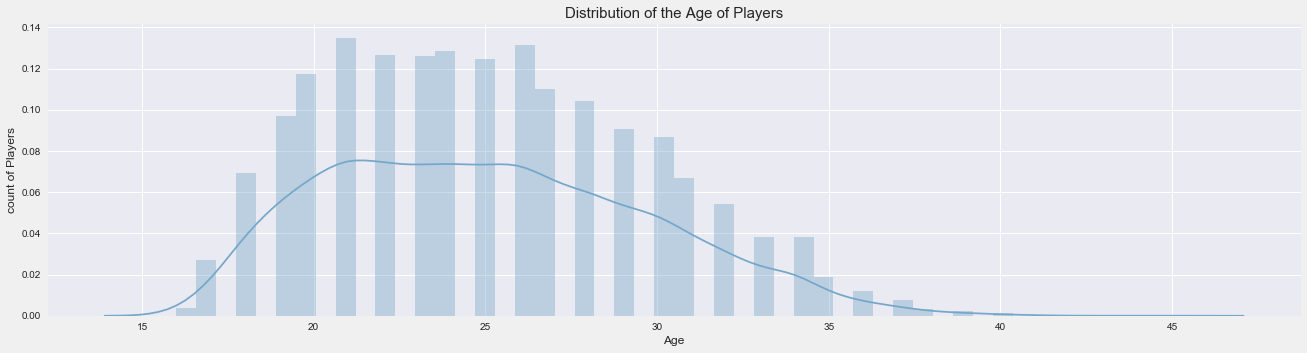

In [21]:
plt.figure(figsize = (20, 5))
plt.style.use('seaborn')
sns.distplot(fifa_data['age'], color = '#75A7C9')
plt.title('Distribution of the Age of Players', fontsize = 15)
plt.xlabel('Age', fontsize = 12)
plt.ylabel('count of Players', fontsize = 12)
plt.show()

According to the graphs of Height and weight, we could see that on average players are 6 foot, and the average weight is around 140 lbs, we can also observe the weights distribution is bell shaped.

Text(0, 0.5, 'Count')

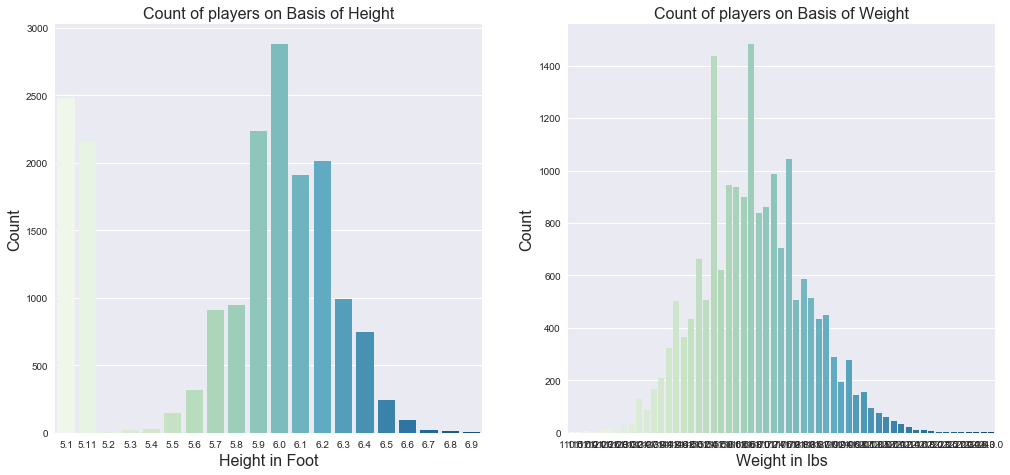

In [22]:
fig, ax =plt.subplots(1, 2, figsize=(15,7))

plt.style.use('ggplot')
ax1 = sns.countplot(x = 'height', data = fifa_data, palette = 'GnBu', ax=ax[0])
ax1.set_title(label = 'Count of players on Basis of Height', fontsize = 16)
ax1.set_xlabel(xlabel = 'Height in Foot', fontsize = 16)
ax1.set_ylabel(ylabel = 'Count', fontsize = 16)

plt.style.use('ggplot')
ax2 = sns.countplot(x = 'weight', data = fifa_data, palette = 'GnBu', ax=ax[1])
ax2.set_title(label = 'Count of players on Basis of Weight', fontsize = 16)
ax2.set_xlabel(xlabel = 'Weight in lbs', fontsize = 16)
ax2.set_ylabel(ylabel = 'Count', fontsize = 16)



Now, lets look at the Overall scores and Potential scores of the players with respect to their age. Accroding to the graph below we could see how both the Potential and actual overall scores are very far, as the potential is set at a high number in the beginning of the players career, and the actual overall score is very low, then gradually they both converge to each other over time, as we know more about the players. 

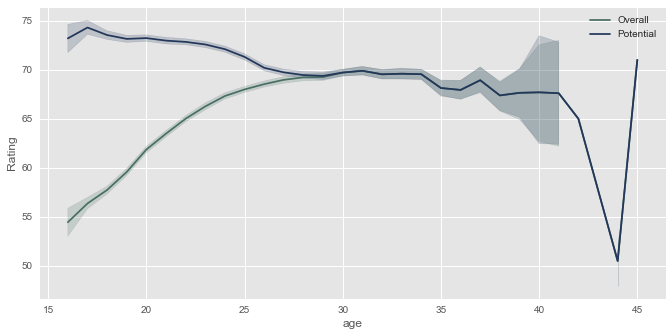

In [23]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10,5)
f, ax = plt.subplots()
g1 = sns.lineplot(fifa_data['age'], fifa_data['overall'],  color = '#486F64', label = 'Overall', ax = ax)
g2 = sns.lineplot(fifa_data['age'], fifa_data['potential'],  color = '#23375B', label = 'Potential', ax = ax)
plt.ylabel('Rating', fontsize = 12)
plt.legend()
plt.show()


The distribution of wages is hugely skewed to the right, which implies that a very small amount of players, mainly the best ones, are the ones that get the really high salaries. Also the distribution has a very long tail, which implies that there is a very big variability in the high salaries. 

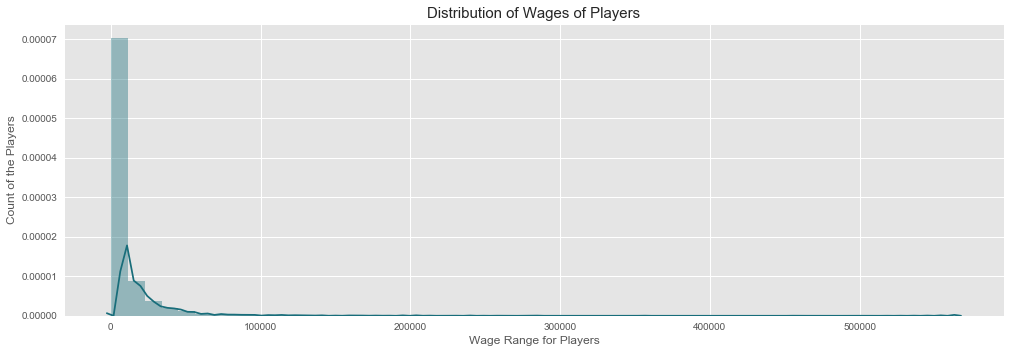

In [24]:
warnings.filterwarnings('ignore')
plt.figure(figsize = (15, 5))
sns.distplot(fifa_data['wage'], color = '#186D7A')
plt.xlabel('Wage Range for Players', fontsize = 12)
plt.ylabel('Count of the Players', fontsize = 12)
plt.title('Distribution of Wages of Players', fontsize = 15)
plt.show()


Let's see if the International Reputation of the players correlates with their wages. As the below graph indicates, there is a general positive linear relationship between the reputation and wage earned. However, it doesn't look like having a good international reputation is an indicator of a higher wage as we can see there's still players with very low wages at 3, 4, and 5 ratings.

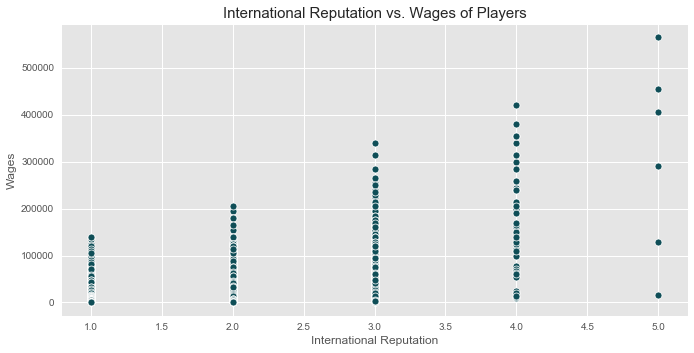

In [25]:
plt.style.use('ggplot')
sns.scatterplot(fifa_data['international_reputation'], fifa_data['wage'], color = '#0F4E57')
plt.title('International Reputation vs. Wages of Players', fontsize = 15)
plt.xlabel('International Reputation', fontsize = 12)
plt.ylabel('Wages', fontsize = 12)
plt.show()

If we look at the Overall Scoring of the players vs. their wages we can see that there's an exponential relationship. Wages increase very slightly in the beginning as Overall scoring of the player increases, then when the scoring is very high, around 85, the wages increase really fast.

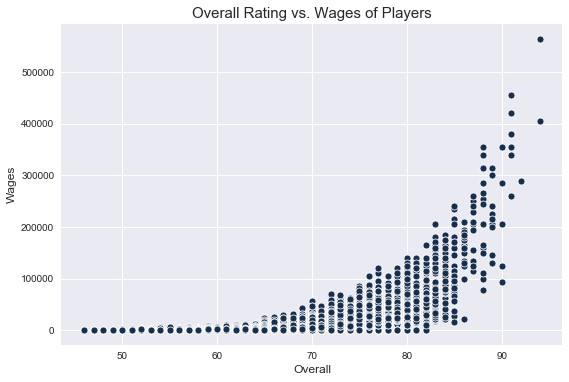

In [26]:
plt.style.use('seaborn')
sns.scatterplot(fifa_data['overall'], fifa_data['wage'], color = '#172F4E')
plt.title('Overall Rating vs. Wages of Players', fontsize = 15)
plt.xlabel('Overall', fontsize = 12)
plt.ylabel('Wages', fontsize = 12)
plt.show()

As the distribution of wages amogst different clubs might imply that for some clubs there's a huge gap between the players wages, whilst in other clubs, the wages are all very close with a very small variablity.

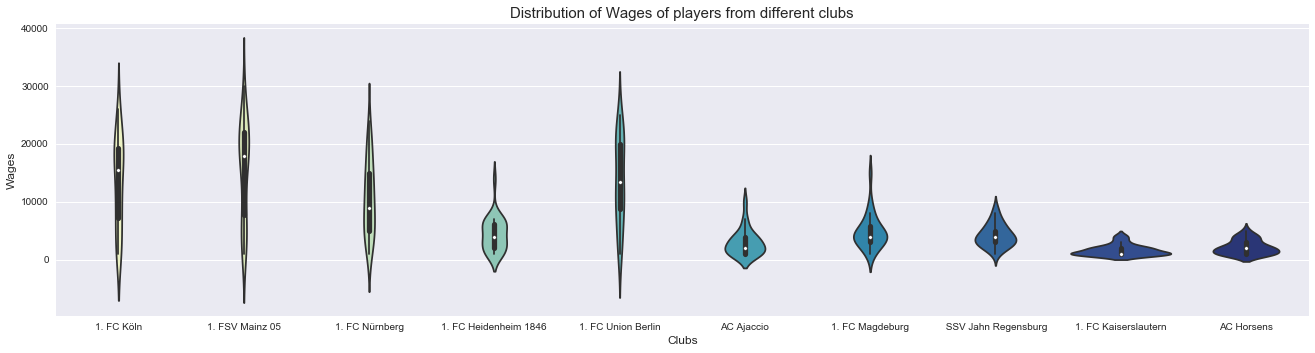

In [27]:
#Highest paying clubs
clubs_df = pd.DataFrame(fifa_data.groupby(['club'])['wage'].mean().reset_index())
clubs_df
clubs = clubs_df.club[:10]
wages_per_club = fifa_data.loc[fifa_data['club'].isin(clubs) & fifa_data['wage']]

plt.figure(figsize = (20, 5))
ax = sns.violinplot(x = wages_per_club['club'], y = wages_per_club['wage'], palette = 'YlGnBu')
ax.set_xlabel(xlabel = 'Clubs', fontsize = 12)
ax.set_ylabel(ylabel = 'Wages', fontsize = 12)
ax.set_title(label = 'Distribution of Wages of players from different clubs', fontsize = 15)
plt.show()



In the below violin plot, we can see that in most countries that have players, who get high wages on average, that the highest paid players are actually outliers.

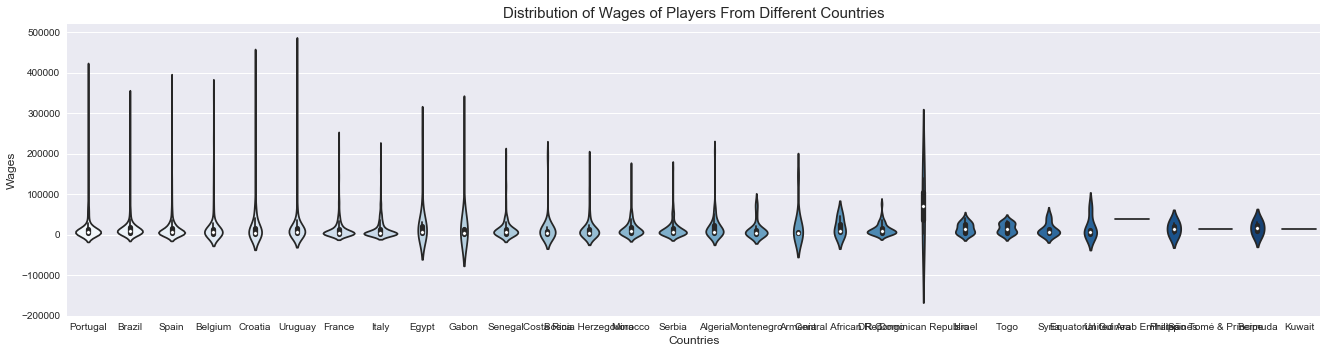

In [28]:
country_df = pd.DataFrame(fifa_data.groupby(['nationality'])['wage'].mean().reset_index())
countries = country_df.sort_values(by = ['wage'], ascending=False)[:30]

wages_per_country = fifa_data.loc[fifa_data['nationality'].isin(countries.nationality) & fifa_data['wage']]

plt.figure(figsize = (20, 5))
ax = sns.violinplot(x = wages_per_country['nationality'], y = wages_per_country['wage'], palette = 'Blues')
ax.set_xlabel(xlabel = 'Countries', fontsize = 12)
ax.set_ylabel(ylabel = 'Wages', fontsize = 12)
ax.set_title(label = 'Distribution of Wages of Players From Different Countries', fontsize = 15)
plt.show()


in the below graph we can see how players get their highest wages in the middle of their career, that's when the players performance is at its peak.

Text(0, 0.5, 'Wage')

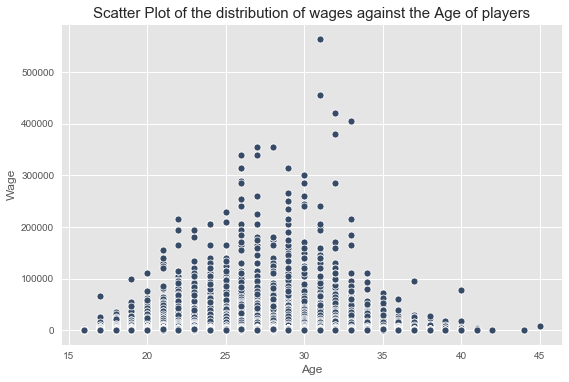

In [29]:
plt.style.use('ggplot')
ax = sns.scatterplot(fifa_data['age'], fifa_data['wage'], color = '#374B67')
ax.set_title(label = 'Scatter Plot of the distribution of wages against the Age of players', fontsize = 15)
ax.set_xlabel(xlabel = 'Age', fontsize = 12)
ax.set_ylabel(ylabel = 'Wage', fontsize = 12)

**Data Analysis**

In our analysis, we want to find the main factors that affect the International reputation of players. Then, we aim to use random forest regression model to classify the data according to International Reputation.

We plot a heat map that show the correlations between the data features. We can observe very high correlations in the players attributes. For example, GKDiving, Handling, etc. are all very highly correlated, which indicate dependance between features. We could also see that wages are positively correlated with value of the player, which makes sense, the higher the value of the player the higher his wage.

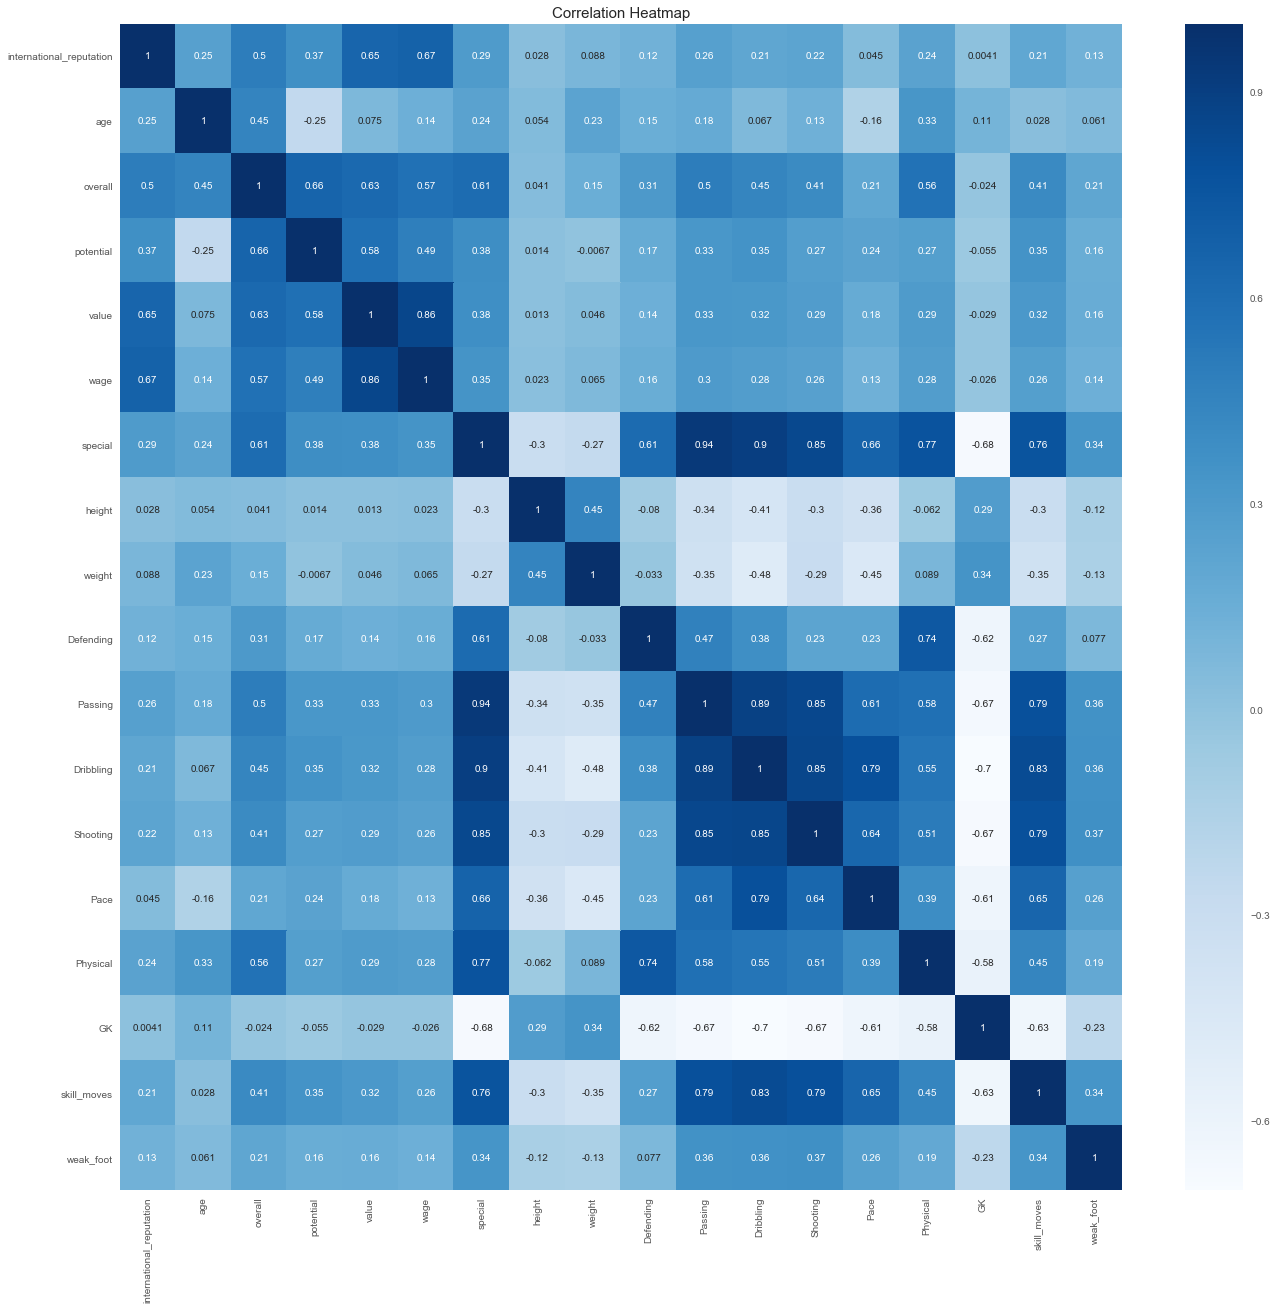

In [30]:
plt.figure(figsize = (20, 20))
sns.heatmap(fifa_data[['international_reputation', 'age', 'overall', 'potential', 'value',
                    'wage', 'special', 
                      'height', 'weight', 'Defending', 'Passing', 'Dribbling',
                       'Shooting', 'Pace', 'Physical','GK','skill_moves', 'weak_foot'
                    ]].corr(), annot = True, cmap = "Blues")

plt.title('Correlation Heatmap', fontsize = 15)
plt.show()

**We can see that most of the players have an international reputation of 1, and there is a very small number of players having an international reputation of 2 to 5.**

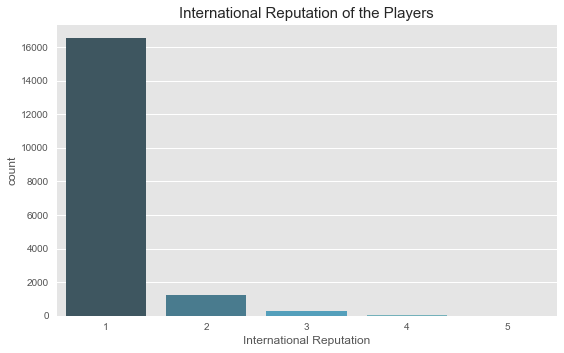

In [31]:
plt.rcParams['figure.figsize'] = (8, 5)
plt.style.use('ggplot')
sns.countplot(fifa_data['international_reputation'], palette = 'GnBu_d')
plt.title('International Reputation of the Players', fontsize = 15)
plt.xlabel('International Reputation', fontsize = 12)
plt.show()

**Looking at the Wage vs. Age scatter plot, we can notice that wherever the player's age is, the more the International Reputation increase, the higher their wage is.**

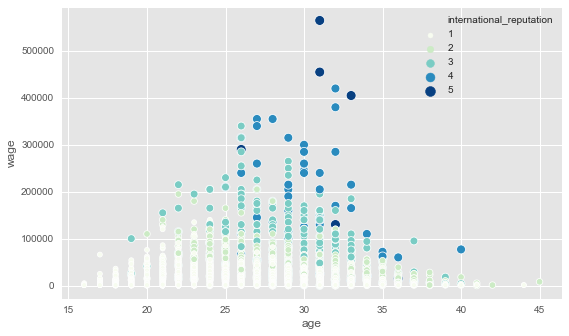

In [32]:
ax = sns.scatterplot(x='age', y='wage', hue='international_reputation',
                     data=fifa_data, palette = 'GnBu', size = 'international_reputation', legend="full")

plottings of the different new attributes, showing the International Reputation. We can see that most of the attributes are not correlated which is good for the model. We can observe that higher combinations of the attributes scoring are associated with higher ratings for International Reputation 

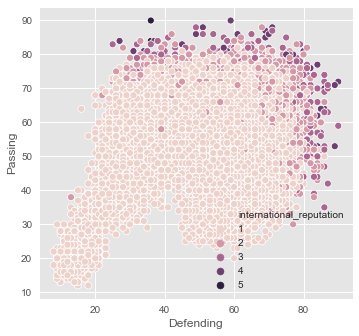

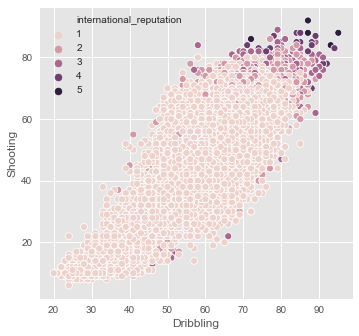

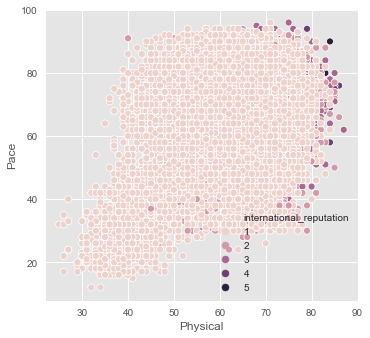

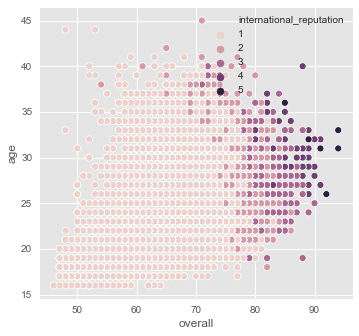

In [33]:
plt.rcParams['figure.figsize'] = (5, 5)
sns.scatterplot(x="Defending", y="Passing", hue = 'international_reputation', legend="full",
                     data=fifa_data)
plt.show()
sns.scatterplot(x="Dribbling", y="Shooting", hue = 'international_reputation', legend="full",
                     data=fifa_data)
plt.show()
sns.scatterplot(x="Physical", y="Pace", hue = 'international_reputation', legend="full",
                     data=fifa_data)
plt.show()
sns.scatterplot(x="overall", y="age", hue = 'international_reputation', legend="full",
                     data=fifa_data)
plt.show()

Using the random forest regressor for our classification problem, we obtain a mean squared error of 0.05. The main important features are the Overall scoring of the player, their Age, and Wage

In [34]:
data_analysis = fifa_data[['international_reputation','age', 'overall', 'potential', 'value',
                    'wage', 'special', 
                      'height', 'weight', 'Defending', 'Passing', 'Dribbling',
                       'Shooting', 'Pace', 'Physical','GK','skill_moves', 'weak_foot']]

In [35]:
#Random Forest Regressor
X_train, X_test, y_train, y_test = train_test_split(data_analysis[data_analysis.columns.difference(['international_reputation'])], 
                                                    data_analysis['international_reputation'],
                                                    test_size=0.2, random_state=0)



sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)



print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.09390753990093562
Mean Squared Error: 0.05844909190974133
Root Mean Squared Error: 0.24176247001911055


In [36]:
feature_list = list(data_analysis.columns.difference(['international_reputation']))
# Get numerical feature importances
importances = list(regressor.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:17} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: overall           Importance: 0.56
Variable: age               Importance: 0.07
Variable: wage              Importance: 0.06
Variable: Shooting          Importance: 0.04
Variable: Pace              Importance: 0.03
Variable: Passing           Importance: 0.03
Variable: special           Importance: 0.03
Variable: value             Importance: 0.03
Variable: Defending         Importance: 0.02
Variable: Dribbling         Importance: 0.02
Variable: GK                Importance: 0.02
Variable: Physical          Importance: 0.02
Variable: height            Importance: 0.02
Variable: potential         Importance: 0.02
Variable: weight            Importance: 0.02
Variable: weak_foot         Importance: 0.01
Variable: skill_moves       Importance: 0.0


## Conclusion
FIFA 19 players form a very good representation of different countries and clubs. We noticed that highest number of players were either a striker position or goal keepers or corner back position. We also noticed that the wages of players have a lot of variability, wither for players in the same club, or across different clubs and countries. Also, we observed that the wages are usually the highest in the middle of the player's career at the age around 25 to 30. (add according to attributes)

As for International Reputation, the data didn't have a good representation of players with the highest International Reputation, most players had a rating of 3, 4, or 5. The classification problem is not very easy as class 1 is over represented and not well seperated from the other classes. According to the random forest regressor we get a very small MSE, and the most important feature is the Overall scoring of the players.

## Resources
https://en.wikipedia.org/wiki/FIFA_19

https://www.kaggle.com/roshansharma/fifa-data-visualization

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

https://github.com/amanthedorkknight/fifa18-all-player-statistics